In [1]:
from simulation import monte_carlo_simulation
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Hypothesis 5. Higher seat occupancy leads to longer evacuation times due to congestion


Running All exits scenario...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extension

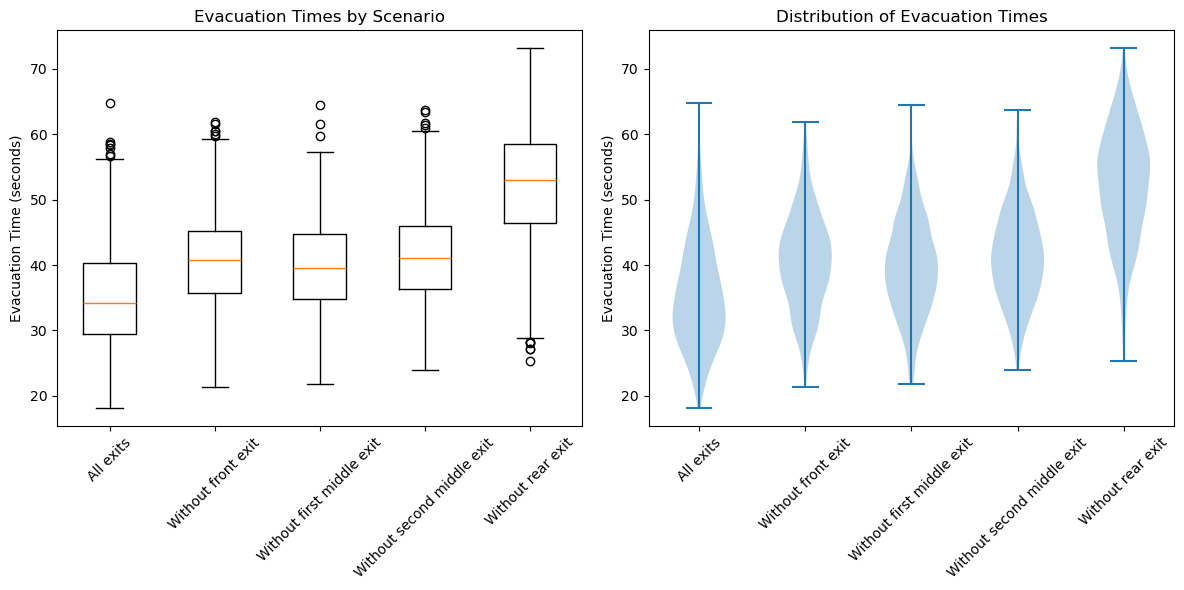


Testing hypothesis for Without front exit:
Increase in evacuation time: 15.0%
Hypothesis not supported (increase is less than 25%)

Testing hypothesis for Without first middle exit:
Increase in evacuation time: 12.8%
Hypothesis not supported (increase is less than 25%)

Testing hypothesis for Without second middle exit:
Increase in evacuation time: 17.2%
Hypothesis not supported (increase is less than 25%)

Testing hypothesis for Without rear exit:
Increase in evacuation time: 48.6%
Hypothesis supported (increase is greater than 25%)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Base configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
all_exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000
proportion_old = 0.3

# Test scenarios
scenarios = {
    'All exits': all_exits,
    'Without front exit': [9, 10, 25],
    'Without first middle exit': [0, 10, 25],
    'Without second middle exit': [0, 9, 25],
    'Without rear exit': [0, 9, 10]
}

results = {}

# Run simulations for each scenario
for scenario_name, exits in scenarios.items():
    print(f"\nRunning {scenario_name} scenario...")
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    results[scenario_name] = evacuation_times

# Calculate baseline statistics
baseline_mean = np.mean(results['All exits'])
baseline_std = np.std(results['All exits'])

# Analyze results
print("\nResults Analysis:")
print("-" * 80)
print(f"{'Scenario':<20} {'Mean Time':<12} {'Std Dev':<12} {'% Increase':<12} {'p-value':<12}")
print("-" * 80)

for scenario_name, times in results.items():
    mean_time = np.mean(times)
    std_dev = np.std(times)
    percent_increase = ((mean_time - baseline_mean) / baseline_mean) * 100

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(results['All exits'], times)

    print(f"{scenario_name:<20} {mean_time:>8.2f}s {std_dev:>10.2f}s {percent_increase:>10.1f}% {p_value:>10.4f}")

# Visualization
plt.figure(figsize=(12, 6))

# Create box plot
plt.subplot(1, 2, 1)
plt.boxplot([times for times in results.values()], tick_labels=list(results.keys()))
plt.xticks(rotation=45)
plt.ylabel('Evacuation Time (seconds)')
plt.title('Evacuation Times by Scenario')

# Create violin plot
plt.subplot(1, 2, 2)
plt.violinplot([times for times in results.values()])
plt.xticks(range(1, len(scenarios) + 1), list(scenarios.keys()), rotation=45)
plt.ylabel('Evacuation Time (seconds)')
plt.title('Distribution of Evacuation Times')

plt.tight_layout()
plt.show()

# Test hypothesis
for scenario_name, times in results.items():
    if scenario_name != 'All exits':
        mean_time = np.mean(times)
        percent_increase = ((mean_time - baseline_mean) / baseline_mean) * 100

        print(f"\nTesting hypothesis for {scenario_name}:")
        print(f"Increase in evacuation time: {percent_increase:.1f}%")
        print(f"Hypothesis {'supported' if percent_increase > 25 else 'not supported'} "
              f"(increase is {'greater' if percent_increase > 25 else 'less'} than 25%)")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Function to calculate Cohen's d
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

# [Keep all the configuration and simulation code the same]

# Analyze results
print("\nResults Analysis:")
print("-" * 100)
print(f"{'Scenario':<20} {'Mean Time':<12} {'Std Dev':<12} {'% Increase':<12} {'p-value':<12} {'Effect Size':<12}")
print("-" * 100)

# Store statistical results
statistical_results = {}

for scenario_name, times in results.items():
    mean_time = np.mean(times)
    std_dev = np.std(times)
    percent_increase = ((mean_time - baseline_mean) / baseline_mean) * 100

    if scenario_name != 'All exits':
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(results['All exits'], times)

        # Calculate Cohen's d effect size
        d = cohens_d(times, results['All exits'])

        # Interpret effect size
        if abs(d) < 0.2:
            effect_magnitude = "negligible"
        elif abs(d) < 0.5:
            effect_magnitude = "small"
        elif abs(d) < 0.8:
            effect_magnitude = "medium"
        else:
            effect_magnitude = "large"

        # Store results
        statistical_results[scenario_name] = {
            'mean': mean_time,
            'std': std_dev,
            'percent_increase': percent_increase,
            'p_value': p_value,
            'effect_size': d,
            'effect_magnitude': effect_magnitude,
            'significant': p_value < 0.05
        }

        print(f"{scenario_name:<20} {mean_time:>8.2f}s {std_dev:>10.2f}s {percent_increase:>10.1f}% "
              f"{p_value:>10.4f} {d:>10.2f} ({effect_magnitude})")

# Summary of findings
print("\nStatistical Summary:")
print("-" * 80)
for scenario, stats_dict in statistical_results.items():
    print(f"\n{scenario}:")
    print(f"- Mean increase: {stats_dict['percent_increase']:.1f}%")
    print(f"- Statistically significant: {'Yes' if stats_dict['significant'] else 'No'} (p = {stats_dict['p_value']:.4f})")
    print(f"- Effect size: {stats_dict['effect_magnitude']} (Cohen's d = {stats_dict['effect_size']:.2f})")
    print(f"- Hypothesis test (>25% increase): {'Supported' if stats_dict['percent_increase'] > 25 else 'Not supported'}")

# Add ANOVA test to compare all scenarios at once
f_stat, p_value = stats.f_oneway(*[times for times in results.values()])
print("\nOne-way ANOVA test:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Overall significant difference between scenarios: {'Yes' if p_value < 0.05 else 'No'}")


Results Analysis:
----------------------------------------------------------------------------------------------------
Scenario             Mean Time    Std Dev      % Increase   p-value      Effect Size 
----------------------------------------------------------------------------------------------------
Without front exit      40.51s       7.29s       15.0%     0.0000       0.70 (medium)
Without first middle exit    39.75s       7.22s       12.8%     0.0000       0.60 (medium)
Without second middle exit    41.29s       6.96s       17.2%     0.0000       0.81 (large)
Without rear exit       52.36s       8.57s       48.6%     0.0000       2.08 (large)

Statistical Summary:
--------------------------------------------------------------------------------

Without front exit:
- Mean increase: 15.0%
- Statistically significant: Yes (p = 0.0000)
- Effect size: medium (Cohen's d = 0.70)
- Hypothesis test (>25% increase): Not supported

Without first middle exit:
- Mean increase: 12.8%
- Stat